In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pilot_data = ['Gianna_ZB216_stroop-master_2024-02-27_14h22.02.975.csv',\
             'Liu_Teng_ZB216_stroop-master_2024-02-27_15h37.26.589.csv',\
             'Sabrina_ZB216_stroop-master_2024-02-27_17h13.56.023.csv']

participant_codes = (1,2,3)

In [10]:
rt_ls = []
rt_con_ls = []
rt_incon_ls = []
rt_neutral_ls = []
corr_con_ls = []
incorr_con_ls = []
missed_con_ls = []
corr_incon_ls = []
incorr_incon_ls = []
missed_incon_ls = []
corr_neutral_ls = []
incorr_neutral_ls = []
missed_neutral_ls = []

for idx in range(len([0,1])):
    
    with open('data/'+pilot_data[idx+1], 'r', encoding="utf8") as file:
        
        df = pd.read_csv(file)
        df_con = df.loc[(df.cond == 1) | (df.cond == 3)]
        df_incon = df.loc[(df.cond == 2) | (df.cond == 4)]
        df_neutral = df.loc[(df.cond == 5) | (df.cond == 6)]
        
        rt_con = df_con['key_resp.rt'].mean()
        rt_incon = df_incon['key_resp.rt'].mean()
        rt_neutral = df_neutral['key_resp.rt'].mean()
        
        corr_con = df_con.loc[df_con['key_resp.corr'] == 1, 'key_resp.corr'].count()
        missed_con = df_con.loc[(df_con['key_resp.corr'] == 0) & (df_con['key_resp.keys'] == None), 'key_resp.corr'].count()
        incorr_con = df_con.loc[df_con['key_resp.corr'] == 0, 'key_resp.corr'].count() - missed_con
        
        corr_incon = df_incon.loc[df_incon['key_resp.corr'] == 1, 'key_resp.corr'].count()
        missed_incon = df_incon.loc[(df_incon['key_resp.corr'] == 0) & (df_incon['key_resp.keys'] == None), 'key_resp.corr'].count()
        incorr_incon = df_incon.loc[df_incon['key_resp.corr'] == 0, 'key_resp.corr'].count() - missed_incon
        
        corr_neutral = df_neutral.loc[df_neutral['key_resp.corr'] == 1, 'key_resp.corr'].count()
        missed_neutral = df_neutral.loc[(df_neutral['key_resp.corr'] == 0) & (df_neutral['key_resp.keys'] == None), 'key_resp.corr'].count()
        incorr_neutral = df_neutral.loc[df_neutral['key_resp.corr'] == 0, 'key_resp.corr'].count() - missed_neutral
        
        rt = df.loc[df['key_resp.corr'] == 1, 'key_resp.rt'].mean()
        
    rt_ls.append(rt)
    rt_con_ls.append(rt_con)
    rt_incon_ls.append(rt_incon)
    rt_neutral_ls.append(rt_neutral)
    corr_con_ls.append(corr_con)
    incorr_con_ls.append(incorr_con)
    missed_con_ls.append(missed_con)
    corr_incon_ls.append(corr_incon)
    incorr_incon_ls.append(incorr_incon)
    missed_incon_ls.append(missed_incon)
    corr_neutral_ls.append(corr_neutral)
    incorr_neutral_ls.append(incorr_neutral)
    missed_neutral_ls.append(missed_neutral)

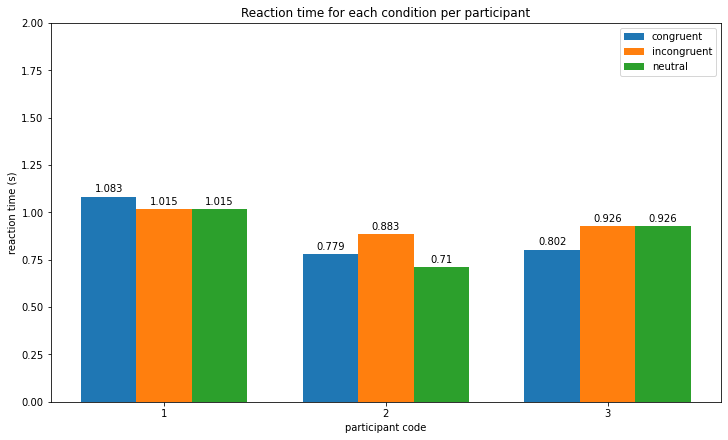

In [61]:
rt_con_ls = [round(i,3) for i in rt_con_ls]
rt_incon_ls = [round(i,3) for i in rt_incon_ls]
rt_neutral_ls = [round(i,3) for i in rt_neutral_ls]

rt_dict = {'congruent': rt_con_ls,\
           'incongruent': rt_incon_ls,\
           'neutral': rt_neutral_ls}

# all conditions rt
x_ticks = np.arange(len(participant_codes))
width = 0.25
multiplier = 0

fig7, ax7 = plt.subplots(layout='constrained')
fig7.set_size_inches(10, 6)
for attribute, measurement in rt_dict.items():
    offset = width * multiplier
    rects = ax7.bar(x_ticks + offset, measurement, width, label=attribute)
    ax7.bar_label(rects, padding=3)
    multiplier += 1

ax7.set_title('Reaction time for each condition per participant')
ax7.set_ylabel('reaction time (s)')
ax7.set_xticks(x_ticks + width, participant_codes)
ax7.set_xlabel('participant code')
ax7.set_ylim(0, 2)
plt.legend()
fig7.savefig("../Task checks/Stroop all conditions rt.jpg")

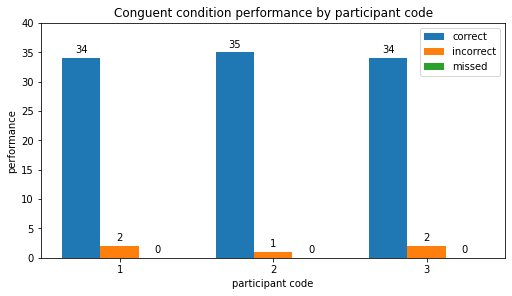

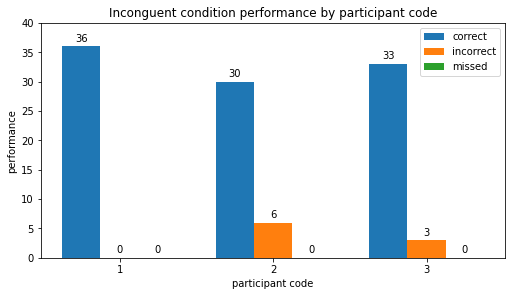

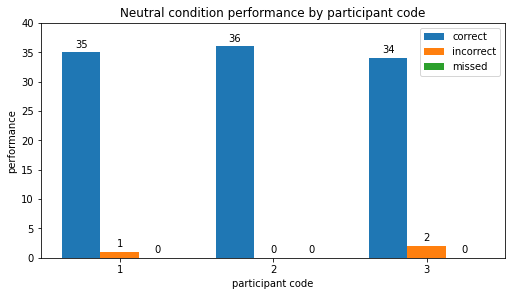

In [64]:
con = {'correct': corr_con_ls, 'incorrect': incorr_con_ls, 'missed': missed_con_ls}
incon = {'correct': corr_incon_ls, 'incorrect': incorr_incon_ls, 'missed': missed_incon_ls}
neutral = {'correct': corr_neutral_ls, 'incorrect': incorr_neutral_ls, 'missed': missed_neutral_ls}

# congruent
x_ticks = np.arange(len(participant_codes))
width = 0.25
multiplier = 0

fig1, ax1 = plt.subplots(layout='constrained')
fig1.set_size_inches(7, 4)
for attribute, measurement in con.items():
    offset = width * multiplier
    rects = ax1.bar(x_ticks + offset, measurement, width, label=attribute)
    ax1.bar_label(rects, padding=3)
    multiplier += 1

ax1.set_title('Conguent condition performance by participant code')
ax1.set_ylabel('performance')
ax1.set_xticks(x_ticks + width, participant_codes)
ax1.set_xlabel('participant code')
ax1.set_ylim(0, 40)
plt.legend()
fig1.savefig("../Task checks/Stroop congruent condition performance.jpg")

# incongruent
x_ticks = np.arange(len(participant_codes))
width = 0.25
multiplier = 0

fig2, ax2 = plt.subplots(layout='constrained')
fig2.set_size_inches(7, 4)
for attribute, measurement in incon.items():
    offset = width * multiplier
    rects = ax2.bar(x_ticks + offset, measurement, width, label=attribute)
    ax2.bar_label(rects, padding=3)
    multiplier += 1

ax2.set_title('Inconguent condition performance by participant code')
ax2.set_ylabel('performance')
ax2.set_xticks(x_ticks + width, participant_codes)
ax2.set_xlabel('participant code')
ax2.set_ylim(0, 40)
plt.legend()
fig2.savefig("../Task checks/Stroop incongruent condition performance.jpg")

# neutral
x_ticks = np.arange(len(participant_codes))
width = 0.25
multiplier = 0

fig3, ax3 = plt.subplots(layout='constrained')
fig3.set_size_inches(7, 4)
for attribute, measurement in neutral.items():
    offset = width * multiplier
    rects = ax3.bar(x_ticks + offset, measurement, width, label=attribute)
    ax3.bar_label(rects, padding=3)
    multiplier += 1

ax3.set_title('Neutral condition performance by participant code')
ax3.set_ylabel('performance')
ax3.set_xticks(x_ticks + width, participant_codes)
ax3.set_xlabel('participant code')
ax3.set_ylim(0, 40)
plt.legend()
fig3.savefig("../Task checks/Stroop neutral condition performance.jpg")

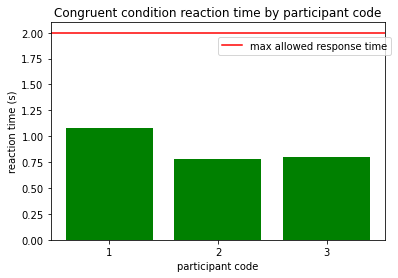

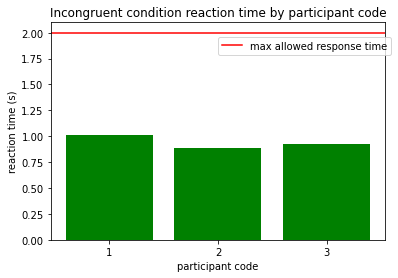

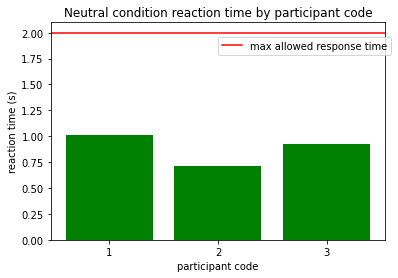

In [43]:
# congruent reaction time
fig4 = plt.figure()
ax4 = fig4.add_subplot(1,1,1)
ax4.axhline(2,color='r', label='max allowed response time')
ax4.bar([1,2,3],rt_con_ls,color='g')
ax4.set_title('Congruent condition reaction time by participant code')
ax4.set_xlabel('participant code')
ax4.set_xticks([1,2,3])
ax4.set_ylabel('reaction time (s)')
plt.legend(loc=(0.5,0.85))
fig4.savefig('../Task checks/stroop_congruent_rt.png')

# incongruent reaction time
fig5 = plt.figure()
ax5 = fig5.add_subplot(1,1,1)
ax5.axhline(2,color='r', label='max allowed response time')
ax5.bar([1,2,3],rt_incon_ls,color='g')
ax5.set_title('Incongruent condition reaction time by participant code')
ax5.set_xlabel('participant code')
ax5.set_xticks([1,2,3])
ax5.set_ylabel('reaction time (s)')
plt.legend(loc=(0.5,0.85))
fig5.savefig('../Task checks/stroop_incongruent_rt.png')

# neutral reaction time
fig6 = plt.figure()
ax6 = fig6.add_subplot(1,1,1)
ax6.axhline(2,color='r', label='max allowed response time')
ax6.bar([1,2,3],rt_neutral_ls,color='g')
ax6.set_title('Neutral condition reaction time by participant code')
ax6.set_xlabel('participant code')
ax6.set_xticks([1,2,3])
ax6.set_ylabel('reaction time (s)')
plt.legend(loc=(0.5,0.85))
fig6.savefig('../Task checks/stroop_neutral_rt.png')

In [11]:
rt_ls

[1.0336746761863607, 0.7859963050041818, 0.8782837386162361]